In [ ]:
# This should be the main file.


## Functions

### Function to pre process FILES

In [1]:
import pandas as pd
import nltk

random_state = 42

def load_and_preprocess_IMDB(filename, nrows=None):
    """ load the IMDB data and preprocess it:
            - remove html tags
            - remove ponctuation
            - convert to lower case
            - remove stop words
            - remove numbers
            - remove extra spaces
            - replave words with their root form (stem)
            - replace words with their lemma
        :param dataset: 'train' or 'test'
        :param nrows: number of rows to read
        :return: df
    """

    # read the data
    df = pd.read_csv(filename, nrows=nrows)

    # keep a copy of the original review
    df['original_review'] = df['review']

    # remove the html tags
    df['review'] = df['review'].str.replace('<br />', ' ')

    # remove the punctuation and '_' characters
    df['review'] = df['review'].str.replace('[^\w\s]', ' ', regex=True)
    df['review'] = df['review'].str.replace('_', ' ', regex=False)

    # convert to lower case
    df['review'] = df['review'].str.lower()

    # remove the stop words
    # nltk.download('stopwords')
    # nltk.download('wordnet')
    from nltk.corpus import stopwords
    
    stop_words = stopwords.words('english')
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

    # remove the numbers - test on https://regexr.com
    df['review'] = df['review'].str.replace('\d+', '', regex=True)

    # remove the extra spaces - test on https://regexr.com
    df['review'] = df['review'].str.replace(' +', ' ', regex=True)

    # replace the words with their root form
    from nltk.stem import SnowballStemmer
    stemmer = SnowballStemmer('english')
    df['review'] = df['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

    # replace the words with their lemma
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    df['review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

    # Remove people's names
    import spacy
    nlp = spacy.load("en_core_web_sm")
    df['review'] = df['review'].apply(lambda x: ' '.join([token.text if token.ent_type_ != 'PERSON' else 'NamePlaceholder' for token in nlp(x)]))

    return df

### Function to pre-process TEXT

In [2]:
import pandas as pd
import spacy
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
      # remove html tags
    text = text.replace('<br />', ' ')

    # remove punctuation and '_'
    for char in ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']:
        text = text.replace(char, ' ')

    # convert to lower case
    text = text.lower()

    # remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # remove numbers
    text = ''.join([char for char in text if not char.isdigit()])

    # remove extra spaces
    text = ' '.join(text.split())

    # replace words with their root form
    stemmer = SnowballStemmer('english')
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    # replace words with their lemma
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    # Remove people's names using spaCy
    nlp = spacy.load("en_core_web_sm")
    text = ' '.join([token.text if token.ent_type_ != 'PERSON' else 'NamePlaceholder' for token in nlp(text)])

    return text

## START

In [5]:
df = load_and_preprocess_IMDB('./data/imdb_data_train.zip')
df.head()

,filename,review,classification,sentiment,original_review
0,1821_4.txt,work one best shakespear sourc film manag cred...,4,0,Working with one of the best Shakespeare sourc...
1,10402_1.txt,well tremor origin start found movi quit enjoy...,1,0,"Well...tremors I, the original started off in ..."
2,1062_4.txt,ouch one bit pain sit cute NamePlaceholder Nam...,4,0,Ouch! This one was a bit painful to sit throug...
3,9056_1.txt,seen crappi movi life one must among worst def...,1,0,"I've seen some crappy movies in my life, but t..."
4,5392_3.txt,carrier follow exploit two guy two gal stolen ...,3,0,"""Carriers"" follows the exploits of two guys an..."


### Show the data grouped by sentiment

In [6]:
df.groupby(by='sentiment').count()

,filename,review,classification,original_review
sentiment,,,,
0,12500,12500,12500,12500
1,12500,12500,12500,12500


### Generate de BOW Matrix

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, # it should already be in lower case...
                                   stop_words='english', # stop words should already have been removed but ...
                                   ngram_range = (1, 1))

cv.fit(df['review'])
count_vectors_train = cv.transform(df['review'])
count_vectors_train

<25000x44994 sparse matrix of type '<class 'numpy.int64'>'
	with 1989914 stored elements in Compressed Sparse Row format>

### Build a dataframe with BoW and add the sentiment column (for an easier visualization)

In [8]:
bow_train = pd.DataFrame(count_vectors_train.toarray(), columns=cv.get_feature_names_out())
bow_train

,aa,aaa,aaaaaaah,aaaaah,aaaaatch,aaaahhhhhhh,aaaand,aaah,aaargh,aaaugh,...,était,état,étc,éveri,êxtase,ís,ísnt,østbye,über,üvegtigri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Try a simple Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

# this can take a while... +1h on M1
tree = DecisionTreeClassifier(
    max_depth=20, # with 3 it takes 2minutes
)
tree.fit(bow_train, df['sentiment'])

DecisionTreeClassifier(max_depth=20)

### Load the test data and pass it through the BOW

In [9]:
df_test = load_and_preprocess_IMDB('./data/imdb_data_test.zip')
count_vectors_test = cv.transform(df_test['review'])

### Build the BOW Matrix

In [10]:
bow_test = pd.DataFrame(count_vectors_test.toarray(), columns=cv.get_feature_names_out())
bow_test


,aa,aaa,aaaaaaah,aaaaah,aaaaatch,aaaahhhhhhh,aaaand,aaah,aaargh,aaaugh,...,était,état,étc,éveri,êxtase,ís,ísnt,østbye,über,üvegtigri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save the model and the vectorizer

In [26]:
import pickle

# save the model to disk
filename = './models/tree_model.sav'
pickle.dump(tree, open(filename,'wb'))

# save the vectorizer to disk
filename = './vectorizers/count_vectorizerNew.sav'
pickle.dump(cv, open(filename,'wb'))

            


## Training

### Now do the same but use and ensemble, with tree , NN and Logistic Regression

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


# Create individual classifiers
tree = DecisionTreeClassifier(max_depth=20, random_state=random_state)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=random_state)
logR = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=random_state) # apparently a lot of people use this fella for these kind of exercises...

# Create a voting ensemble
ensemble = VotingClassifier(estimators=[('tree', tree), ('mlp', mlp), ('lgr',logR)], voting='hard',n_jobs=-1)

# Train the ensemble
ensemble.fit(bow_train,df['sentiment'])


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=20,
                                                     random_state=42)),
                             ('mlp',
                              MLPClassifier(max_iter=100, random_state=42)),
                             ('lgr',
                              LogisticRegression(C=1, max_iter=500,
                                                 random_state=42))],
                 n_jobs=-1)

### Predictions

In [13]:
# Make predictions with the ensemble
ensemble_predictions = ensemble.predict(bow_test)
ensemble_predictions



array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

### Show the Score

In [14]:
score=accuracy_score(df['sentiment'],ensemble_predictions) # best Teachers score = 0.79 . mine 0.8468
score

0.8468

### Confusion

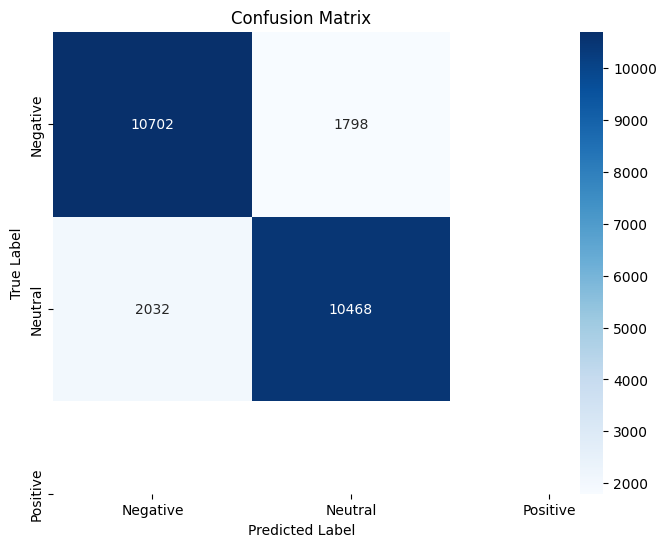

In [15]:

# Calculate and print the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

conf_matrix = confusion_matrix(df_test['sentiment'], ensemble_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Word Cloud for MLP Only

{'aa': 0.08705851526833777, 'aaa': -0.06737973724165568, 'aaaaaaah': -0.08650698289430542, 'aaaaah': 0.07296601913690177, 'aaaaatch': 0.01477270076479534, 'aaaahhhhhhh': -0.0828804245023542, 'aaaand': -0.07659275132326918, 'aaah': 0.08297312470614086, 'aaargh': -0.0687360186818383, 'aaaugh': -0.06745777653626799, 'aaawwwwnnn': -0.0724749339135546, 'aachen': 0.10061038082872654, 'aada': 0.07837147179400546, 'aadha': -0.10001870150640997, 'aag': -0.09548473140325962, 'aaghh': -0.09128458018736188, 'aah': -0.08240940298875596, 'aahhh': 0.09343592681510317, 'aaip': -0.09161712425945134, 'aakash': 0.06833987454589721, 'aakrosh': 0.07983980099476339, 'aaliyah': 0.06719427975249213, 'aam': 0.07180135774244911, 'aamir': -0.08958296765075537, 'aan': -0.07567097779925233, 'aankh': -0.06631337639340575, 'aankhen': -0.06899540332986992, 'aap': -0.06946869561998863, 'aapk': -0.06973427518749037, 'aapkey': 0.06681094281250838, 'aardman': -0.07660171293632305, 'aardvark': -0.09220794242069864, 'aargh

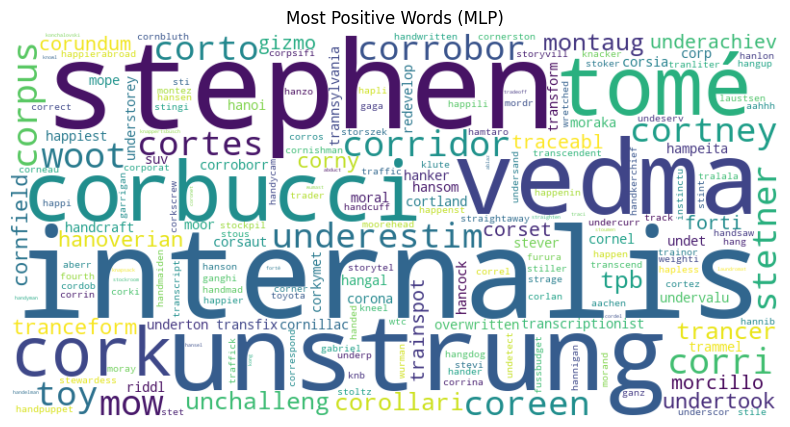

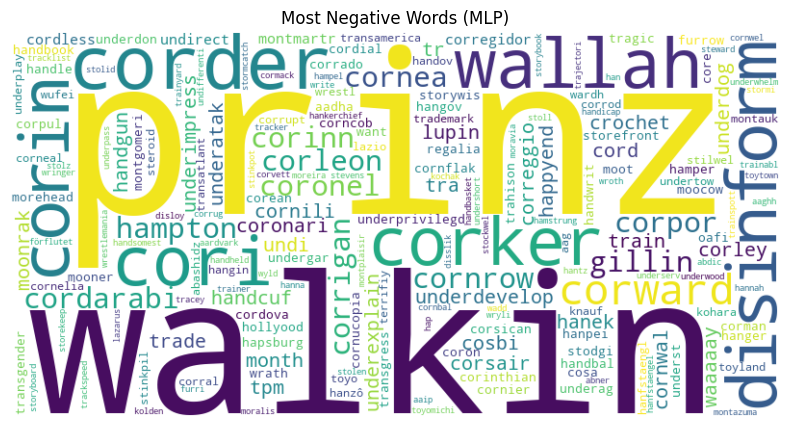

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fit the MLP model on your data
mlp.fit(bow_train, df['sentiment'])

# Get the feature names from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Get the coefficients from the MLP classifier after fitting
coefficients = mlp.coefs_[0].flatten()

# Create a dictionary mapping feature names to coefficients
coef_dict = dict(zip(feature_names, coefficients))
print (coef_dict)

# Create a WordCloud for positive words
mlp_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: coef for word, coef in coef_dict.items() if coef > 0})

# Plot the MLP word cloud
plt.figure(figsize=(10, 5))
plt.imshow(mlp_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Positive Words (MLP)')
plt.show()

# Create a WordCloud for negative words
mlp_negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: -coef for word, coef in coef_dict.items() if coef < 0})

# Plot the MLP negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(mlp_negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Negative Words (MLP)')
plt.show()


### Word Cloud For Logistic Regression Only

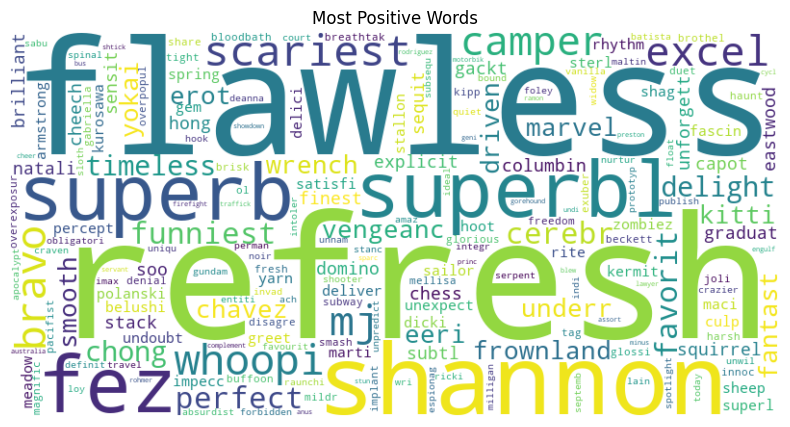

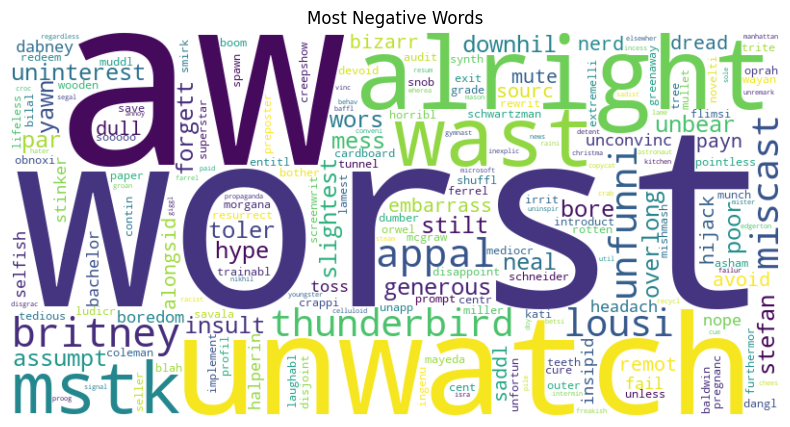

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fit the Logistic Regression model on your data
logR.fit(bow_train, df['sentiment'])

# Get the feature names from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Get the coefficients from the Logistic Regression classifier after fitting
coefficients = logR.coef_[0]

# Create a dictionary mapping feature names to coefficients
coef_dict = dict(zip(feature_names, coefficients))

# Create a WordCloud for positive words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: coef for word, coef in coef_dict.items() if coef > 0})

# Plot the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Positive Words')
plt.show()

# Create a WordCloud for negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: -coef for word, coef in coef_dict.items() if coef < 0})

# Plot the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Negative Words')
plt.show()


### Word cloud for the ensemble

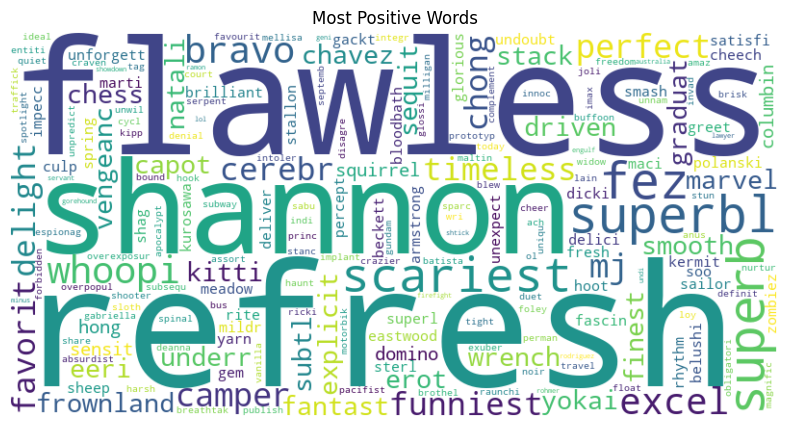

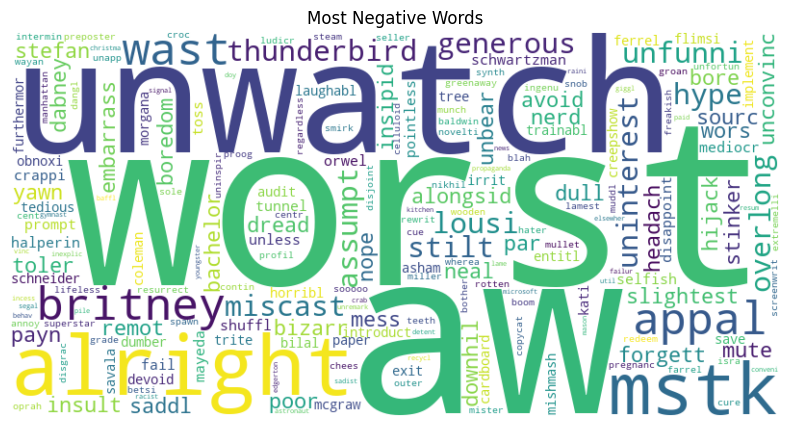

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Initialize an array to store feature importance or coefficients
all_coefficients = np.zeros(len(feature_names))

# Aggregate feature importance or coefficients from individual classifiers in the ensemble
for estimator in ensemble.estimators_:
    if hasattr(estimator, 'coef_'):
        # Linear classifier (e.g., Logistic Regression)
        coefficients = estimator.coef_[0]
    elif hasattr(estimator, 'feature_importances_'):
        # Tree-based classifier (e.g., Decision Tree)
        coefficients = estimator.feature_importances_
    else:
        # Handle other types of classifiers if needed
        coefficients = np.zeros(len(feature_names))

    all_coefficients += coefficients

# Create a dictionary mapping feature names to aggregated coefficients
coef_dict = dict(zip(feature_names, all_coefficients))

# Create a WordCloud for positive words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: coef for word, coef in coef_dict.items() if coef > 0})

# Plot the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Positive Words')
plt.show()

# Create a WordCloud for negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({word: -coef for word, coef in coef_dict.items() if coef < 0})

# Plot the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Negative Words')
plt.show()


### Save the Model to disk

In [25]:
import pickle

# save the model to disk
filename = './models/ensembleFinal.sav'
pickle.dump(ensemble, open(filename,'wb'))

## Testing with text!

### Trying just one text

In [24]:

test = preprocess_text("Hello I hate this. This is horrible!")
# Convert the preprocessed text to a bag-of-words representation using the same vectorizer used during training
cvText = cv.transform([test])
bow_testText = pd.DataFrame(cvText.toarray(), columns=cv.get_feature_names_out())
predictTest = ensemble.predict(bow_testText)

if (predictTest[0]== 1 ) : 
    print("Positivo")
else :
    print ("Negativo")

Negativo


### Trying another text

In [21]:
test = preprocess_text("I love this weather, it is great!")
# Convert the preprocessed text to a bag-of-words representation using the same vectorizer used during training
cvText = cv.transform([test])
bow_testText = pd.DataFrame(cvText.toarray(), columns=cv.get_feature_names_out())
predictTest = ensemble.predict(bow_testText)

if (predictTest[0]== 1 ) : 
    print("Positivo")
else :
    print ("Negativo")

Positivo
